# Machine Learning
# Assignment 3: SVM

Please write your full name here
- **Name** : "Hasnaa Hossam Hassanein"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment3_FirstnameLastname.ipynb"
- Late submissions will be penalized.

In [182]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

### Use the following function to plot the classification regions

In [183]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [184]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

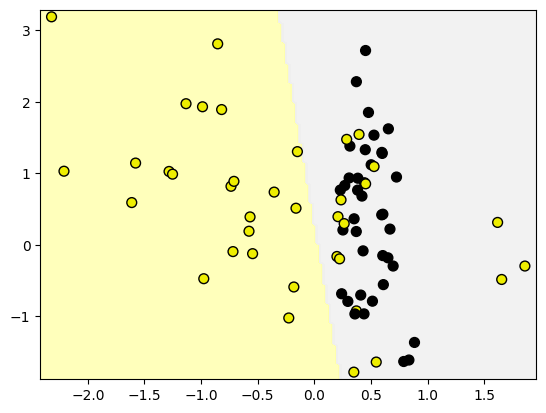

In [186]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

plot_class_regions_for_classifier(svm_model, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.0001.
2. Train another SVM classifier using linear kernel with C=95
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

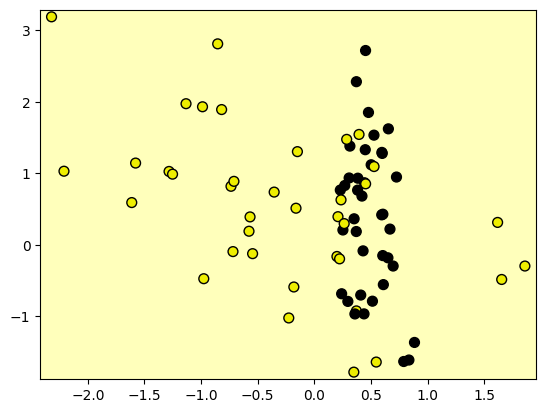

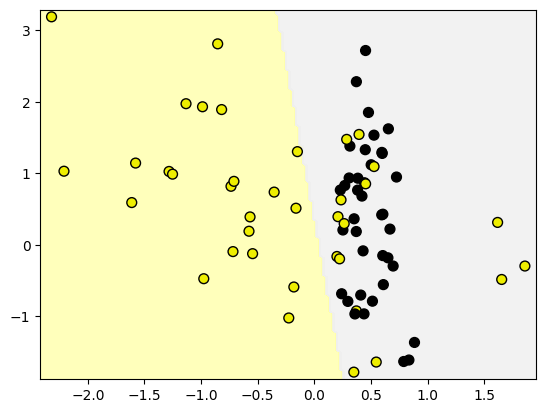

In [187]:
svm_model_2 = SVC(kernel='linear', C=0.0001)
svm_model_2.fit(X_train, y_train)

svm_model_3 = SVC(kernel='linear', C=95)
svm_model_3.fit(X_train, y_train)

plot_class_regions_for_classifier(svm_model_2, X_train, y_train)
plot_class_regions_for_classifier(svm_model_3, X_train, y_train)

Comment on the results

**C = 0.0001 :** <br>
Lower C applies high regulaization. The model priotrizes simplicity and maximize margins between classes. As a result, the model underfits the data, all data is classified as one class only.

**C = 95 :** <br>
 Higher C applies low regulaization. The model focuses in correctly classifing the data rather than maximizing the margins. As a result, The model fits data well.

### Use the fruits dataset in questions 4, 5, 6.

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import pandas as pd
fruits = pd.read_table('/content/drive/MyDrive/Machine Learning Dr. Inas/fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

In [190]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

In [191]:
from sklearn.svm import LinearSVC

X_fruits = fruits.drop('fruit_label', axis=1)
y_fruits = fruits['fruit_label']

X_fruits_h_w = X_fruits[['height', 'width']]
X_train, X_test, y_train, y_test = train_test_split(X_fruits_h_w, y_fruits, test_size=0.25, random_state=0)

svm_fruits_model = LinearSVC()
svm_fruits_model.fit(X_train, y_train)

print(f"Training Score: {svm_fruits_model.score(X_train, y_train)}")
print(f"Testing Score: {svm_fruits_model.score(X_test, y_test)}")

Training Score: 0.75
Testing Score: 0.4666666666666667


#### Question 5
For the previous model from question 4.
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

In [192]:
print(f'Number of trained SVM models: {len(svm_fruits_model.coef_)}')

print(f'Coefficients: {svm_fruits_model.coef_}')
print(f'Intercept: {svm_fruits_model.intercept_}')

Number of trained SVM models: 4
Coefficients: [[-0.28037302  0.47594355]
 [-1.10758759  0.78948855]
 [-0.03929154  0.21300773]
 [ 1.01073208 -1.26248135]]
Intercept: [-1.5126779   0.7872759  -1.67988201  0.3759239 ]


There are 4 models because the data has 4 classes (apple, mandarin, orange, lemon)

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.
(plot it any way you can)

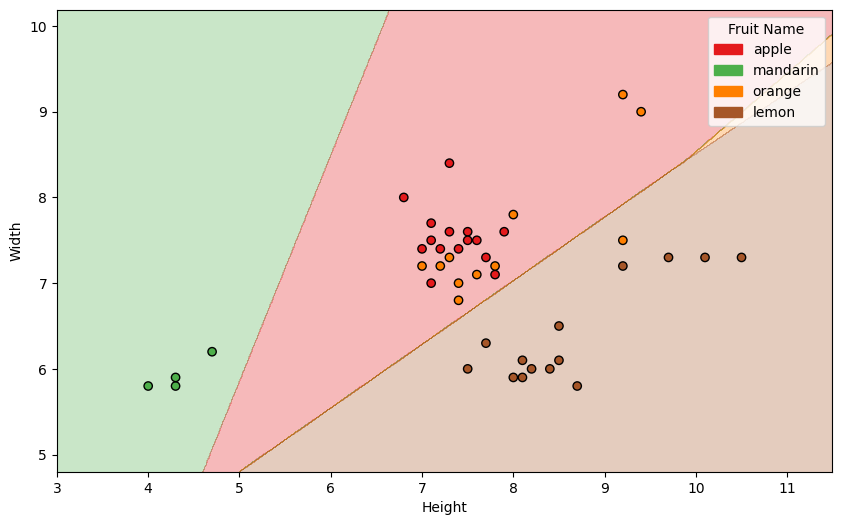

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

# Create mapping label -> name
label_to_name = dict(zip(fruits['fruit_label'], fruits['fruit_name']))

h = 0.01
x_min, x_max = X_train['height'].min() - 1, X_train['height'].max() + 1
y_min, y_max = X_train['width'].min() - 1, X_train['width'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

mesh_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['height', 'width'])
predictions = svm_fruits_model.predict(mesh_points)
predictions = predictions.reshape(xx.shape)

# Prepare consistent color mapping
unique_labels = sorted(y_train.unique())
cmap = ListedColormap([plt.cm.Set1(i / len(unique_labels)) for i in range(len(unique_labels))])

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, predictions, alpha=0.3, cmap=cmap)

scatter = plt.scatter(X_train['height'], X_train['width'], c=y_train, edgecolors='k', cmap=cmap)

# Custom legend
legend_patches = [mpatches.Patch(color=cmap(i), label=label_to_name[unique_labels[i]]) for i in range(len(unique_labels))]
plt.legend(handles=legend_patches, title="Fruit Name")

plt.xlabel('Height')
plt.ylabel('Width')

plt.show()

 Use the breast cancer dataset in question 7, 8, and9.

In [194]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [195]:

from sklearn.model_selection import GridSearchCV

X_cancer_train, X_cancer_test, y_cancer_train, y_cancer_test = train_test_split(X_cancer, y_cancer, test_size=0.25, random_state=0)

svm_cancer_model = SVC()
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}

grid = GridSearchCV(svm_cancer_model, parameters, cv=5)
grid.fit(X_cancer_train, y_cancer_train)

print(f'Best Parameters: {grid.best_params_}')

Best Parameters: {'C': 10, 'kernel': 'rbf'}


#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

In [196]:
svm_cancer_best_model = SVC(C=10, kernel='rbf')
svm_cancer_best_model.fit(X_cancer_train, y_cancer_train)

print(f'Training Score: {svm_cancer_best_model.score(X_cancer_train, y_cancer_train)}')
print(f'Testing Score: {svm_cancer_best_model.score(X_cancer_test, y_cancer_test)}')

Training Score: 0.9154929577464789
Testing Score: 0.9370629370629371


#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.

In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_cancer_train_scaled = scaler.fit_transform(X_cancer_train)
X_cancer_test_scaled = scaler.transform(X_cancer_test)

parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.001, 0.01, 0.1, 0.5, 1, 10]}

grid = GridSearchCV(svm_cancer_best_model, parameters, cv=5)
grid.fit(X_cancer_train_scaled, y_cancer_train)

print(f"Best Parameters: {grid.best_params_}")

best_model = grid.best_estimator_

print(f"Training accuracy: {best_model.score(X_cancer_train_scaled, y_cancer_train)}")
print(f"Testing accuracy: {best_model.score(X_cancer_test_scaled, y_cancer_test)}")

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Training accuracy: 0.9859154929577465
Testing accuracy: 0.965034965034965
